# Time Series Analysis
  
  ## Stock Trading Strategy
 

In [120]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [121]:
# imoprt packages
import pandas_datareader as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt

TSLA


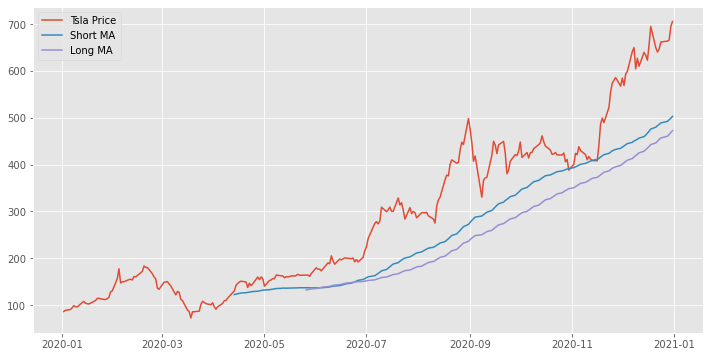

Based on year of 2020 trading record: 
Short period: 70 day 
Long period: 100 day
Highest return rate: 63.99%


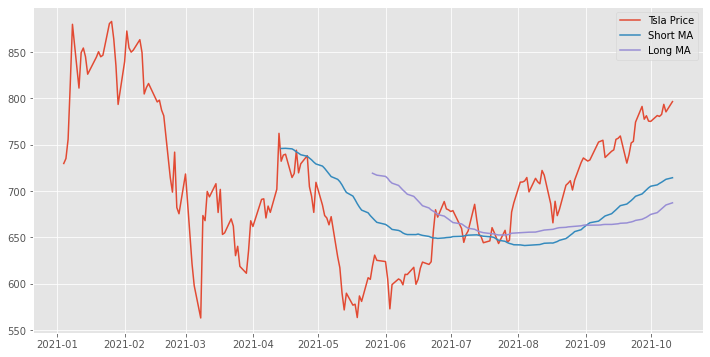

Total balance of year 2021 to today is 10513.47


TWTR


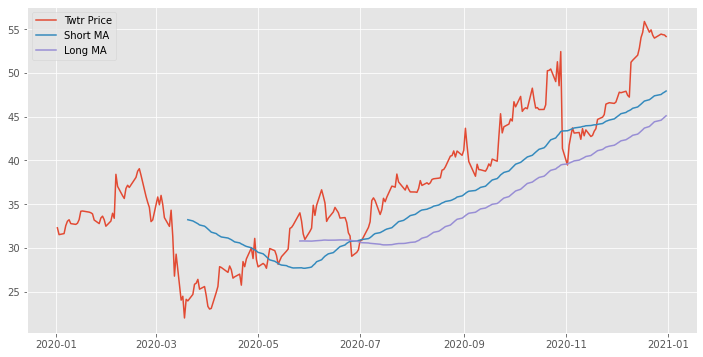

Based on year of 2020 trading record: 
Short period: 55 day 
Long period: 100 day
Highest return rate: 47.56%


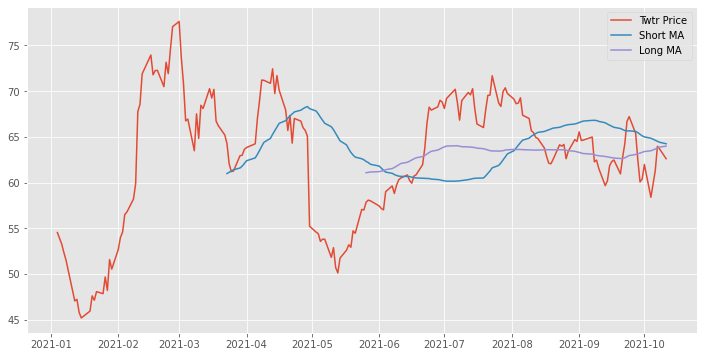

Total balance of year 2021 to today is 9561.33


GME


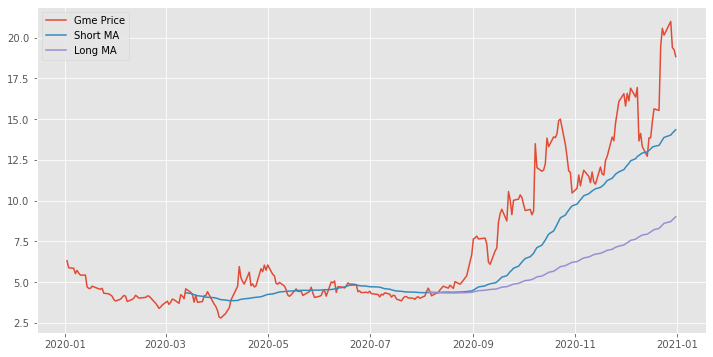

Based on year of 2020 trading record: 
Short period: 50 day 
Long period: 150 day
Highest return rate: 106.22%


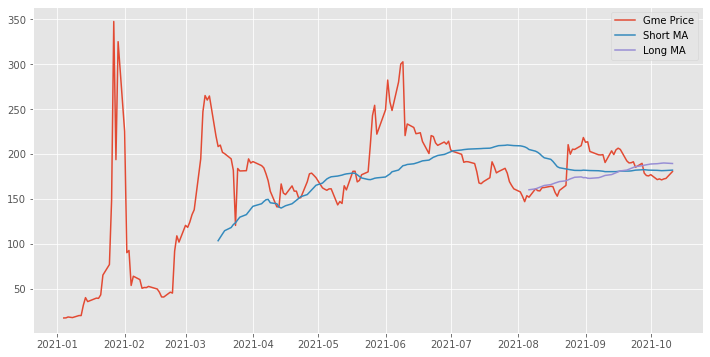

Total balance of year 2021 to today is 14130.34


BILI


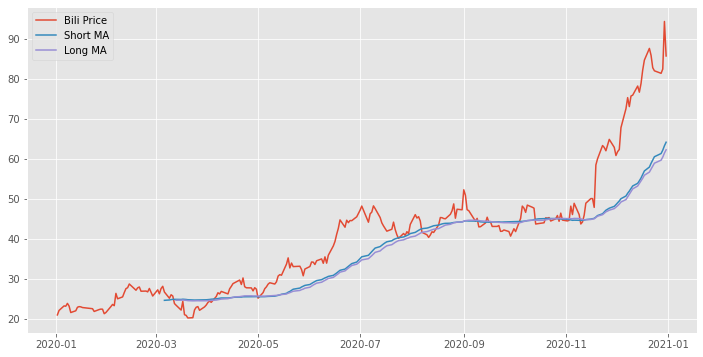

Based on year of 2020 trading record: 
Short period: 45 day 
Long period: 50 day
Highest return rate: 90.6%


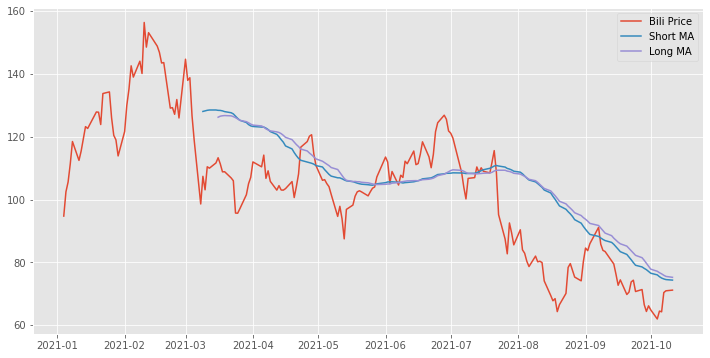

Total balance of year 2021 to today is 11185.52


FB


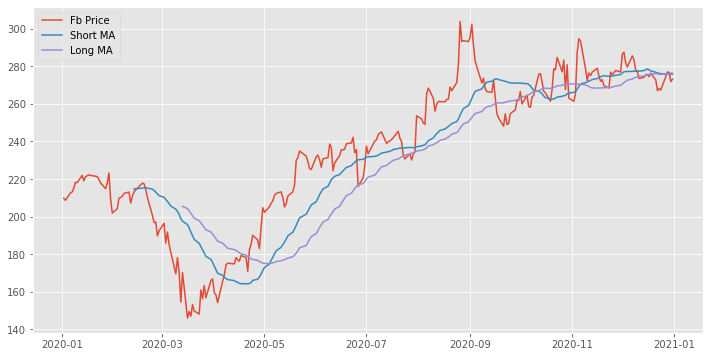

Based on year of 2020 trading record: 
Short period: 30 day 
Long period: 50 day
Highest return rate: 20.8%


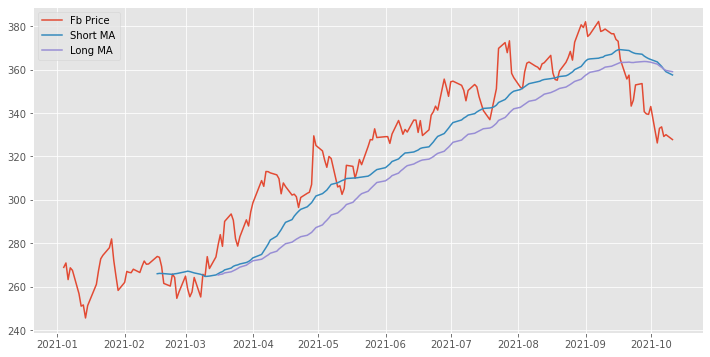

Total balance of year 2021 to today is 11802.22


SNAP


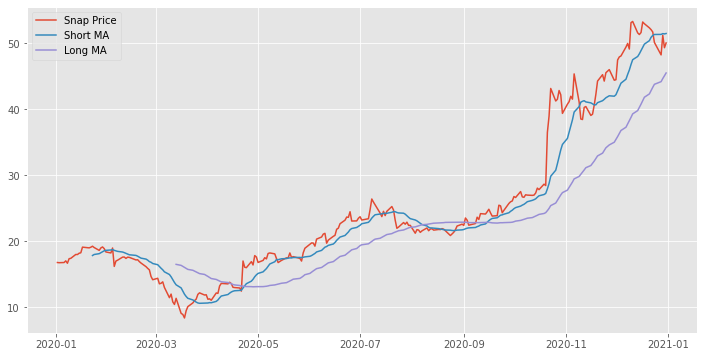

Based on year of 2020 trading record: 
Short period: 15 day 
Long period: 50 day
Highest return rate: 74.61%


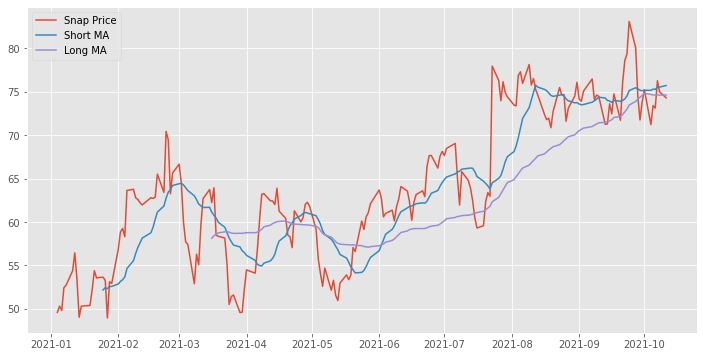

Total balance of year 2021 to today is 9162.78


PYPL


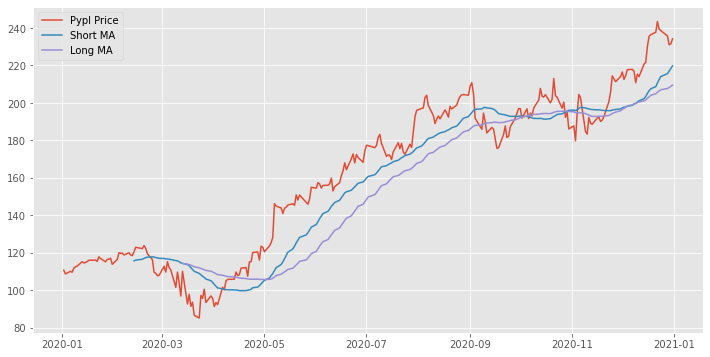

Based on year of 2020 trading record: 
Short period: 30 day 
Long period: 50 day
Highest return rate: 14.02%


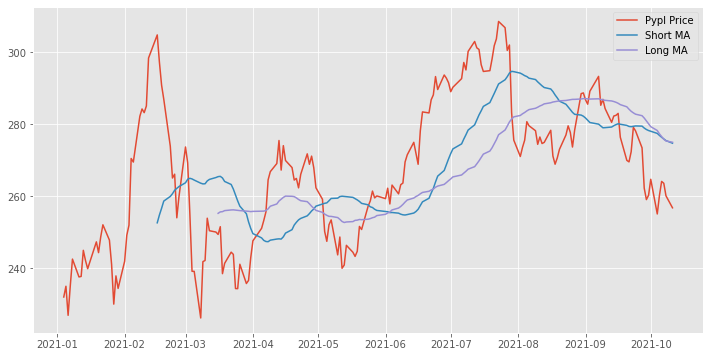

Total balance of year 2021 to today is 9206.15


AAPL


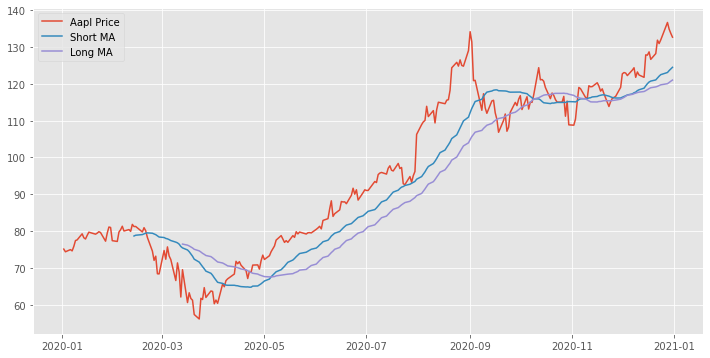

Based on year of 2020 trading record: 
Short period: 30 day 
Long period: 50 day
Highest return rate: 15.99%


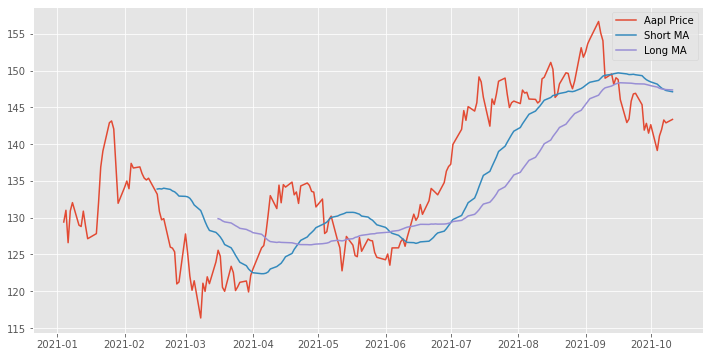

Total balance of year 2021 to today is 9945.85


TSM


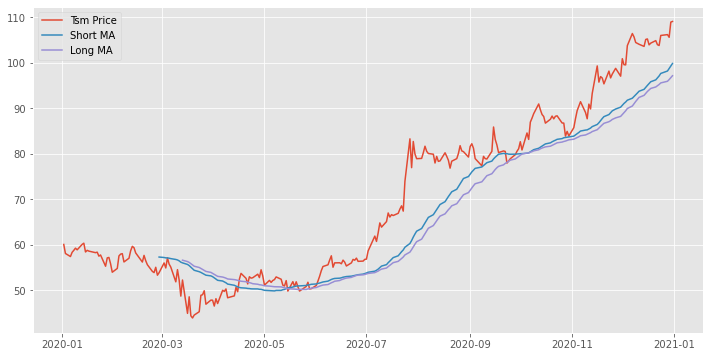

Based on year of 2020 trading record: 
Short period: 40 day 
Long period: 50 day
Highest return rate: 7.33%


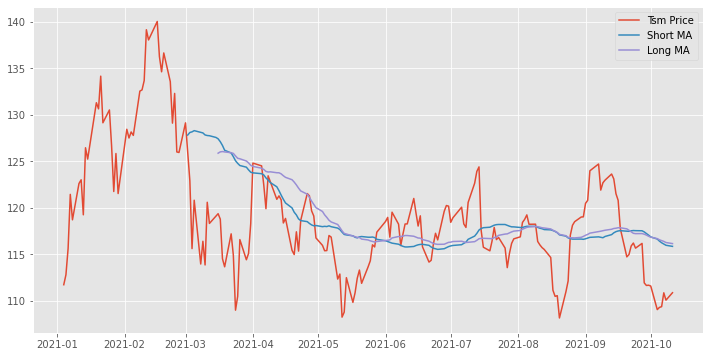

Total balance of year 2021 to today is 9042.45


GOOG


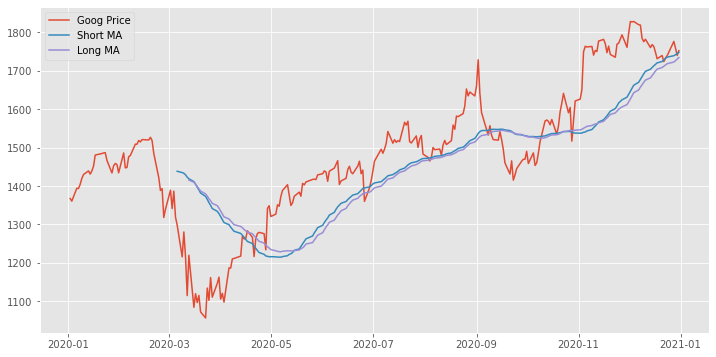

Based on year of 2020 trading record: 
Short period: 45 day 
Long period: 50 day
Highest return rate: 19.48%


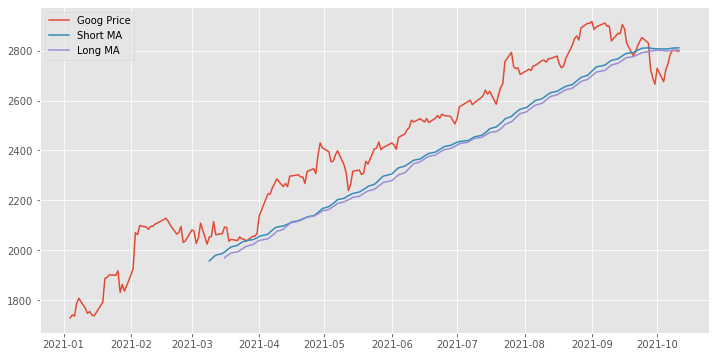

Total balance of year 2021 to today is 12055.9


Year to date Balance: 106606.01


In [168]:
# calculate the optimized pair of SHORT and LONG period of 2020
def get_optimized_period(symbol):
    start_date= '20200101'
    end_date= '20201231'
    timeDF= pdr.get_data_yahoo(symbol, start=start_date, end = end_date)
    timeDF.drop(['Adj Close','High','Low','Volume'], axis=1, inplace=True)
    timeDF.reset_index(inplace=True,drop=False)
    timeDF.set_index('Date',inplace=True)
    short_period=0
    long_period=0
    highest_rate=0
    # the begging of long_period = 50
    long = 50
    while long < 365 - long:
        # the beggining of short_period = 10
        short = 10
        while long > short:
            rate = calculate_rate(short,long,timeDF)
            if rate>highest_rate:
                highest_rate=rate
                short_period = short
                long_period = long
            short+=5
        long+=50
    # adding short and long term moving average column  
    timeDF['Short_MA'] = timeDF['Close'].rolling(window=short_period).mean()
    timeDF['Long_MA']=timeDF['Close'].rolling(window=long_period).mean()
    symbol_label = symbol.title() + ' Price'
    # data visulization   
    with plt.style.context('ggplot'):
        plt.figure(figsize=(12,6))
        plt.plot(timeDF['Close'], label=symbol_label)
        plt.plot(timeDF['Short_MA'],label='Short MA')
        plt.plot(timeDF['Long_MA'],label='Long MA')
        plt.legend()
        plt.show()
    print('Based on year of 2020 trading record: \n' + 'Short period: '+str(short_period)+' day '
          +'\nLong period: ' +str(long_period)+ ' day'+'\nHighest return rate: '+str(highest_rate)+'%')
    return {'short_period': short_period, 'long_period':long_period, 'highest_rate':highest_rate}

# calculate return rate
def calculate_rate(short,long,timeDF):
    timeDF['Short_MA'] = timeDF['Close'].rolling(window=short).mean()
    timeDF['Long_MA']=timeDF['Close'].rolling(window=long).mean()
    timeDF['Return'] = timeDF.Close / timeDF.Open
    
    timeDF['Hold'] = timeDF['Short_MA'] > timeDF['Long_MA']
    timeDF['Sys_Return'] = np.where(timeDF.Hold.shift(1) == True, timeDF.Return, 1)
    timeDF['Bal'] = STARTING_BALANCE * timeDF['Sys_Return'].cumprod()
    return_rate = round(((timeDF.Bal[-1] / timeDF.Bal[0]) - 1) * 100, 2)
    return return_rate

# calculate the final balance
def calculate_balance(short, long, symbol, timeDF):
    timeDF['Short_MA'] = timeDF['Close'].rolling(window=short).mean()
    timeDF['Long_MA']=timeDF['Close'].rolling(window=long).mean()
    timeDF['Return'] = timeDF.Close / timeDF.Open
    symbol_label = symbol.title() + ' Price'
    with plt.style.context('ggplot'):
        plt.figure(figsize=(12,6))
        plt.plot(timeDF['Close'], label=symbol_label)
        plt.plot(timeDF['Short_MA'],label='Short MA')
        plt.plot(timeDF['Long_MA'],label='Long MA')
        plt.legend()
        plt.show()
    # entries sign(sell when short_ma above long_ma)
    timeDF['Hold'] = timeDF['Short_MA'] > timeDF['Long_MA']
    # calculate system return rate
    timeDF['Sys_Return'] = np.where(timeDF.Hold.shift(1) == True, timeDF.Return, 1)
    # generate the running balance
    timeDF['Bal'] = STARTING_BALANCE * timeDF['Sys_Return'].cumprod()
    return timeDF.Bal[-1]

# calculate the year to date balance
def get_ytd_balance(short, long, symbol):
    start_date= '20210101'
    end_date= datetime.date.today()
    timeDF= pdr.get_data_yahoo(symbol, start=start_date, end = end_date)
    timeDF.drop(['Adj Close','High','Low','Volume'], axis=1, inplace=True)
    timeDF.reset_index(inplace=True,drop=False)
    timeDF.set_index('Date',inplace=True)
    return calculate_balance(short, long, symbol, timeDF)

# portfolio
SYMBOL_LIST = ['TSLA','TWTR','GME','BILI','FB','SNAP','PYPL','AAPL','TSM','GOOG']
STARTING_BALANCE = 10000
total = 0
for symbol in SYMBOL_LIST:
    print(symbol)
    history_analyse = get_optimized_period(symbol)
    ytd_balance = round(get_ytd_balance(history_analyse['short_period'], history_analyse['long_period'],symbol),2)
    total += ytd_balance
    print('Total balance of year 2021 to today is '+str(ytd_balance)+'\n\n')
print('Year to date Balance: ' + str(total))
